# Гравитационная система стабилизации наноспутника формата CubeSat

## Уравнения движения
Получим уравнения движения спутника массой $m$, движущегося по круговой орбите высоты $h$ в центральном поле тяготения, представимого в виде упргой ассиметричной гантели жескостью $c$ с диссипативной вязкой силой с коэффициентом трения $\beta$, действущей на груз массы $\alpha m$ в направлении продольной оси системы.

![image info](gr.png)

Введем обобщенные координаты: угол отколения $\varphi$ продольной оси спутника от надира и расстояние $\xi$ от центра масс спутника до груза. 

Для описания движения спутника воспользуемся лагранжевым подходом. Найдем лагранжиан системы, для этого запишем кинетическую и потенциальную энергию системы. 

$$T = \dfrac{1}{2} m \dfrac{\alpha + 1}{\alpha} \xi^2 \dot\varphi^2 + \dfrac{1}{2}m\dfrac{\alpha + 1}{\alpha}\dot\xi^2$$

$$U = -\dfrac{\mu m}{R^2}(1 - \alpha^2)\xi \cos{\varphi} - \dfrac{\mu m}{R^3} \dfrac{\alpha + 1}{\alpha} \xi^2 \cos^2{\varphi} - \dfrac{1}{2}m\dfrac{\mu}{R^3}\xi^2 - \dfrac{1}{2}\alpha m \dfrac{\mu}{R^3} \dfrac{\xi^2}{\alpha^2} + \dfrac{1}{2}c(\xi + \dfrac{\xi}{\alpha} - l_0)^2$$

Тогда 

$$L = T - U = \dfrac{1}{2} m \dfrac{\alpha + 1}{\alpha} \xi^2 \dot\varphi^2 + \dfrac{1}{2}m\dfrac{\alpha + 1}{\alpha}\dot\xi^2 +\dfrac{\mu m}{R^2}(1 - \alpha^2)\xi \cos{\varphi} + \dfrac{\mu m}{R^3} \dfrac{\alpha + 1}{\alpha} \xi^2 \cos^2{\varphi} + \dfrac{1}{2}m\dfrac{\mu}{R^3}\xi^2 + \dfrac{1}{2}\alpha m \dfrac{\mu}{R^3} \dfrac{\xi^2}{\alpha^2} - \dfrac{1}{2}c(\xi + \dfrac{\xi}{\alpha} - l_0)^2$$

Поскольку система не консервативна, то также найдем обобщенные силы 

$$Q_{\varphi} = Q_{\varphi}^{tr} + Q_{\varphi}^{cor} = \dfrac{\delta A_{\varphi}^{tr}}{\delta \varphi} + \dfrac{\delta A_{\varphi}^{cor}}{\delta \varphi} = \alpha m \frac{\xi}{\alpha}\cos{(\dfrac{\pi}{2} - \varphi)} + m \dfrac{\mu}{R^2}\xi \cos{(\dfrac{\pi}{2} + \varphi)} + 0 = 0$$
$$Q_{\xi} = Q_{\xi}^{tr} + Q_{\xi}^{cor} = \dfrac{\delta A_{\xi}^{tr}}{\delta \xi} + \dfrac{\delta A_{\xi}^{cor}}{\delta \xi} = m (\alpha + 1)\dfrac{\mu}{R^2}\cos{\varphi}$$

Следовательно уравнения движения примут вид 

\begin{equation}
 \begin{cases}
 \dfrac{d}{dt} \dfrac{\partial L}{\partial \dot\varphi} - \dfrac{\partial L}{\partial \varphi} = Q_{\varphi}\\
 \dfrac{d}{dt} \dfrac{\partial L}{\partial \dot\xi} - \dfrac{\partial L}{\partial \xi} = Q_{\xi}
 \end{cases}
\end{equation}

\begin{equation}
 \begin{cases}
 \ddot\varphi = -2\dfrac{\dot\xi \dot\varphi}{\xi} - \dfrac{\mu}{R^2}\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{\sin{\varphi}}{\xi} - \dfrac{\mu}{R^3}sin^2{\varphi}\\
 \ddot \xi = \dot \varphi^2 \xi + \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{\varphi} + 2 \dfrac{\mu}{R^3}\xi \cos^{\varphi} + \dfrac{\mu}{R^3}\xi - \dfrac{c}{m}(\xi + \dfrac{\xi}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{\varphi} - \beta \dot\xi
 \end{cases}
\end{equation}

Для дальнейшего численного интегрирования преобразуем эту систему к нормальной форме Коши. 

Введем вектор состояния $\bar x$ системы 

\begin{equation}
\bar x = \begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix} = \begin{pmatrix}
\varphi \\
\dot\varphi \\
\xi \\
\dot\xi
\end{pmatrix}
\end{equation}

Тогда наша система уравнений перепишется в виде 

\begin{equation}
    \begin{cases}
    \dot x_1 = x_2 \\
    \dot x_2 = -2\dfrac{x_4 x_2}{x_3} - \dfrac{\mu}{R^2}\dfrac{\alpha(1 - \alpha^2)}{\alpha + 1}\dfrac{\sin{x_1}}{x_3} - \dfrac{\mu}{R^3}sin^2{x_1}\\
    \dot x_3 = x_4 \\
    \dot x_4 = x_2^2 x_3 + \dfrac{\mu}{R^2}\dfrac{\alpha (1 - \alpha^2)}{\alpha + 1}\cos{x_1} + 2 \dfrac{\mu}{R^3}x_3 \cos^2{x_1} + \dfrac{\mu}{R^3}x_3 - \dfrac{c}{m}(x_3 + \dfrac{x_3}{\alpha} - l_0) + m(\alpha + 1)\dfrac{\mu}{R^2}\cos{x_1} - \beta x_4
    \end{cases}
\end{equation}

Как видим, у нас получились сильно нелинейные уравнения, в которых присутсвуют перекресные члены, содержащие как $\dot \varphi$, так и $\dot \xi$, за счет чего можно гасить угловые колебания не напрямую, используя устройства, создающие тормозящий момент пропорциональный $\dot \varphi$, а косвенно - через демпфирование продольных колебаний.    

## Магнитное трение 

Торможение вдоль продольной оси $\xi$ реализуем на основе известного физического эффекта - торможения постоянного магнита в полой диамагнитной трубе из-за возникающих в сечении индуцированных токов фуко, создающих противоположно направленное магнитное поле.

Можно показать, что коэффециент трения в таком случае равен 

$$\beta = \dfrac{12}{1024}\mu_0^2 p_0^2 \sigma (\dfrac{1}{r_1^3} - \dfrac{1}{r_2^3})$$
где $p_m = MV = \dfrac{B_r}{\mu_0}V$ -  магнитный момент, приходящийся на единицу объёма груза, $B_r$ - средняя остаточная намагниченность магнита.

Для дальнейших расчетов зададимся конкретными конструкционными параметрами и особенностями реализации применительно к кубсату формфактора 3U. Материал трубы - алюминий, диаметр - 2 см, толщина стенок - 1 мм, длина - 1.5 м, масса - 0.55 кг. Материал магнита - неодим, средняя остаточная намагниченность - 1.3 Тл, форма - цилиндр, диаметр - 2 см, высота - 20 см, масса - 0.45 кг. 

## Моделирование 

В ходе численного решения уравнений движения были опробированны несколько интеграторов, классический RK4 оказался не самым оптимальным и в конечном итоге выбор пал на Radau, т.к. он полностью неявный и предоставляет возможность решения жестких систем с приемлемой точностью и временем расчета. 

При расчете были использованы следующие параметры: суммарная масса спутника $m \sim 6 \; кг$, жесткость пружины $c = 60 \;Н/м$, коэффициент трения $\beta = 3500$, начальный углол возмущения $\varphi_0 = \dfrac{\pi}{3}$, длина пружины в нерастянутом состоянии $l_0 = 0.4$  

1) $\alpha = 1$ 

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def odeint(m, c, beta, alpha, l_0, phi_0):
    G = 6.6743e-11
    M = 5.972e24
    mu = G * M
    R = 6371000 + 400000
    Omega = (mu / R**3)**0.5
    Per = 2 * np.pi / Omega

    T = 250000
    x_0 = np.array([phi_0, 0, 2 * l_0, 0])
    t_0 = 0
    t_e = T
    t = np.linspace(0, T, 1000000)

    def right_part(t, x):
        right_part = np.zeros(4)
        right_part[0] = x[1]
        right_part[1] = - 2 * x[3] * x[1] / x[2] - mu / R**2 * alpha * (1 - alpha**2) / (alpha + 1) * np.sin(x[0]) / x[2] - mu / R**3 * np.sin(2 * x[0])
        right_part[2] = x[3]
        right_part[3] = x[1]**2 * x[2] + mu / R**2 * alpha * (1 - alpha**2) / (alpha + 1) * np.cos(x[0]) + 2 * mu / R**3 * x[2] * np.cos(x[0])**2 + mu / R**3 * x[2] - c / m * (x[2] + x[2] / alpha - l_0) + m * (alpha + 1) * mu / R**2 * np.cos(x[0]) - beta * x[3]
        return right_part

    x = solve_ivp(right_part, [t_0, t_e], x_0, t_eval = t, method = 'Radau')
    t = t / Per
    plt.plot(t, x.y[0] * 180 / np.pi)
    plt.xlabel(r'$t, per$')
    plt.ylabel(r'$\theta, grad$')
    plt.show()
    plt.plot(t, x.y[2])
    plt.xlabel(r'$t, per$')
    plt.ylabel(r'$\xi, m$')
    plt.show()

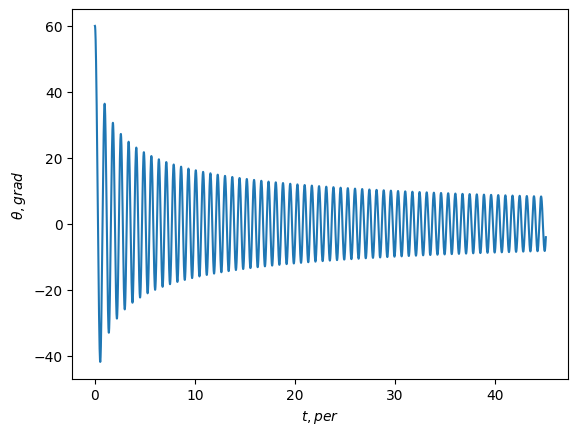

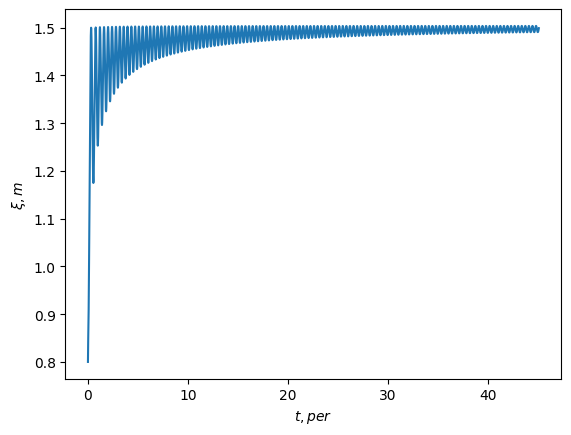

In [9]:
odeint(3, 60, 3500, 1, 0.4, np.pi / 3)

2) $\alpha = \dfrac{1}{12}$

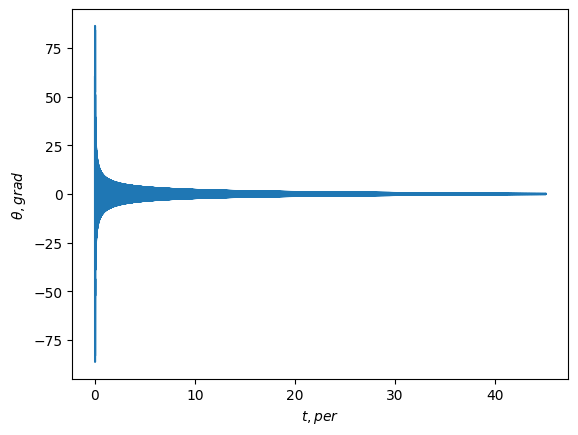

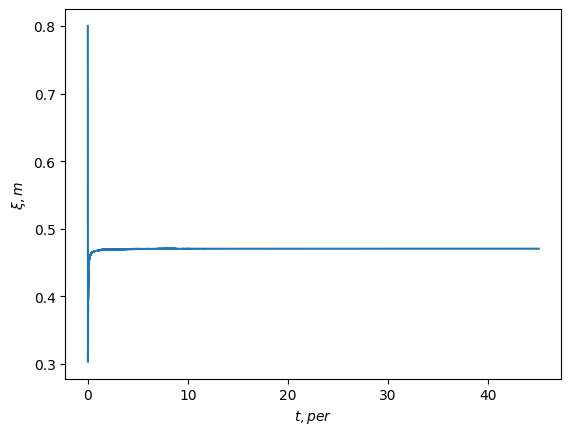

In [10]:
odeint(6, 60, 3500, 1 / 12, 0.4, np.pi / 3)